In [1]:
import seaborn as sns
import numpy as np

print(f"Versão do numpy: {np.__version__}")
print(f"Versão do seaborn: {sns.__version__}")

Versão do numpy: 1.20.3
Versão do seaborn: 0.11.2


In [2]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"
dados = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [3]:
dados.value_counts()

preco       vendido  idade_do_modelo  km_por_ano 
-840.36     1        20               21367.20718    1
 78335.47   0        5                15365.97832    1
 78319.55   1        12               22178.31454    1
 78322.13   0        12               9398.54560     1
 78323.94   0        14               17126.59628    1
                                                    ..
 51754.81   0        18               40116.01818    1
 51758.45   1        16               12768.50356    1
 51777.60   1        14               39256.63062    1
 51785.14   1        13               15251.71518    1
 118929.72  0        5                15795.67210    1
Length: 10000, dtype: int64

In [4]:
# import pandas_profiling

# pandas_profiling.ProfileReport(dados)


In [5]:
# situação horrível de "azar" onde as classes estão ordenadas por padrão

dados_azar = dados.sort_values("vendido", ascending=True)
x_azar = dados_azar[["preco", "idade_do_modelo","km_por_ano"]]
y_azar = dados_azar["vendido"]
dados_azar.head()

,preco,vendido,idade_do_modelo,km_por_ano
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


In [6]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
import numpy as np

SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier(strategy="stratified")
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com dummy stratified, 10 = [49.79, 53.45]


In [7]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 10 = [73.83, 77.73]


In [8]:
# gerando dados elatorios de modelo de carro para simulacao de agrupamento ao usar nosso estimador

np.random.seed(SEED)
dados['modelo'] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.modelo = dados.modelo + abs(dados.modelo.min()) + 1
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


In [9]:
def imprime_resultados(results):
  media = results['test_score'].mean() * 100
  desvio = results['test_score'].std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [10]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 75.78
Intervalo [73.67, 77.90]


In [12]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 75.78
Intervalo [73.67, 77.90]


In [12]:
import graphviz
from sklearn.tree import export_graphviz

modelo.fit(x_azar, y_azar)

features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True, class_names=['não', 'sim'], feature_names=features)

graph = graphviz.Source(dot_data)
graph

AttributeError: 'SVC' object has no attribute 'tree_'

Accuracy médio 78.67
Intervalo [76.40, 80.94]


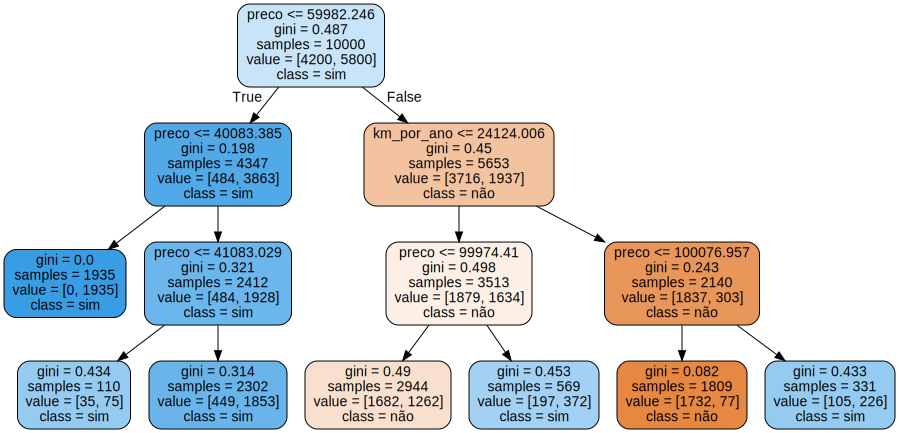

In [14]:
# Se eu mudar para profundidade 3

from sklearn.model_selection import GroupKFold
import graphviz
from sklearn.tree import export_graphviz

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

modelo.fit(x_azar, y_azar)

features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True, class_names=['não', 'sim'], feature_names=features)

graph = graphviz.Source(dot_data)
graph

## Explorando hiperparâmetros em uma dimensão.

In [15]:
# Testando 
def roda_arvore_de_decisao(max_depth):
    SEED = 301
    np.random.seed(SEED)

    cv = GroupKFold(n_splits = 10)
    modelo = DecisionTreeClassifier(max_depth=max_depth)
    results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
    test_score = results['test_score'].mean() * 100
    train_score = results['train_score'].mean() * 100
    # print("Max depth = %d, teste = %.2f, treino = %.2f" % (max_depth, test_score, train_score))
    
    tabela = [max_depth, train_score, test_score]

    return tabela

resultados = [roda_arvore_de_decisao(i) for i in range(1, 33)]
resultados = pd.DataFrame(resultados, columns=['max_depth', 'train', 'test'])
resultados.head()


,max_depth,train,test
0,1,75.791169,75.784219
1,2,75.791169,75.784219
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912


Overfit: Ficou "perfeito" demais para o treino mas ruim para o teste.

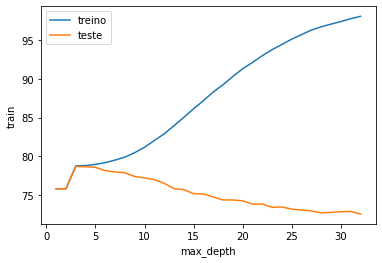

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# plotando treino e teste
sns.lineplot(x='max_depth', y='train', data=resultados)
sns.lineplot(x='max_depth', y='test', data=resultados)
plt.legend(['treino', 'teste'])


# 02. Explorando 2 dimensões de hiperparâmetros

[Artigo](https://ken-hoffman.medium.com/decision-tree-hyperparameters-explained-49158ee1268e)


In [17]:
# Testando 
def roda_arvore_de_decisao(max_depth, min_samples_leaf):
    SEED = 301
    np.random.seed(SEED)

    cv = GroupKFold(n_splits = 10)
    modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
    results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
    test_score = results['test_score'].mean() * 100
    train_score = results['train_score'].mean() * 100
    print("Max depth = %d, min_samples_leaf = %d teste = %.2f, treino = %.2f" % (max_depth, min_samples_leaf, test_score, train_score))
    
    tabela = [max_depth, min_samples_leaf, train_score, test_score]

    return tabela

def busca():
    resultados = []
    for max_depth in range(1, 33):
        for min_samples_leaf in [32, 64, 128, 256]:
            tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
            resultados.append(tabela)
    resultados = pd.DataFrame(resultados, columns=['max_depth', 'min_samples_leaf', 'train', 'test'])
    return resultados

resultados = busca()
resultados.head()

Max depth = 1, min_samples_leaf = 32 teste = 75.78, treino = 75.79
Max depth = 1, min_samples_leaf = 64 teste = 75.78, treino = 75.79
Max depth = 1, min_samples_leaf = 128 teste = 75.78, treino = 75.79
Max depth = 1, min_samples_leaf = 256 teste = 75.78, treino = 75.79
Max depth = 2, min_samples_leaf = 32 teste = 75.78, treino = 75.79
Max depth = 2, min_samples_leaf = 64 teste = 75.78, treino = 75.79
Max depth = 2, min_samples_leaf = 128 teste = 75.78, treino = 75.79
Max depth = 2, min_samples_leaf = 256 teste = 75.78, treino = 75.79
Max depth = 3, min_samples_leaf = 32 teste = 78.67, treino = 78.75
Max depth = 3, min_samples_leaf = 64 teste = 78.67, treino = 78.75
Max depth = 3, min_samples_leaf = 128 teste = 78.67, treino = 78.75
Max depth = 3, min_samples_leaf = 256 teste = 78.67, treino = 78.75
Max depth = 4, min_samples_leaf = 32 teste = 78.67, treino = 78.75
Max depth = 4, min_samples_leaf = 64 teste = 78.67, treino = 78.75
Max depth = 4, min_samples_leaf = 128 teste = 78.67, tre

,max_depth,min_samples_leaf,train,test
0,1,32,75.791169,75.784219
1,1,64,75.791169,75.784219
2,1,128,75.791169,75.784219
3,1,256,75.791169,75.784219
4,2,32,75.791169,75.784219


In [18]:
# tabela dos melhores:

resultados.sort_values(by=['test'], ascending=False).head(5)

,max_depth,min_samples_leaf,train,test
15,4,256,78.750993,78.672633
12,4,32,78.750993,78.672633
14,4,128,78.750993,78.672633
13,4,64,78.750993,78.672633
8,3,32,78.750993,78.672633


In [19]:
corr = resultados.corr()

<AxesSubplot:>

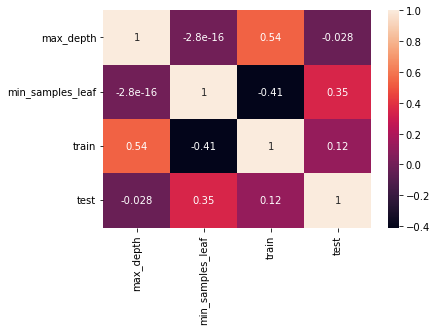

In [20]:
sns.heatmap(corr, annot=True)

Documentação [scatter matriz](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html).

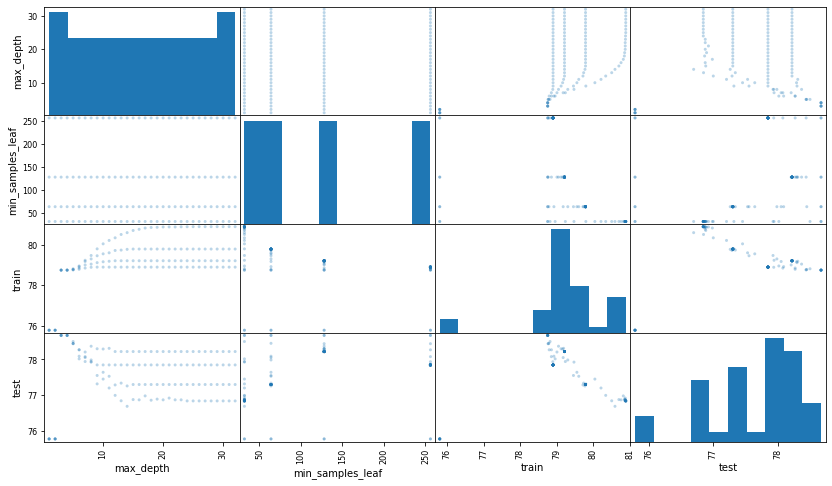

In [21]:
pd.plotting.scatter_matrix(resultados, figsize=(14,8), alpha=0.3)
plt.show()

documentação [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

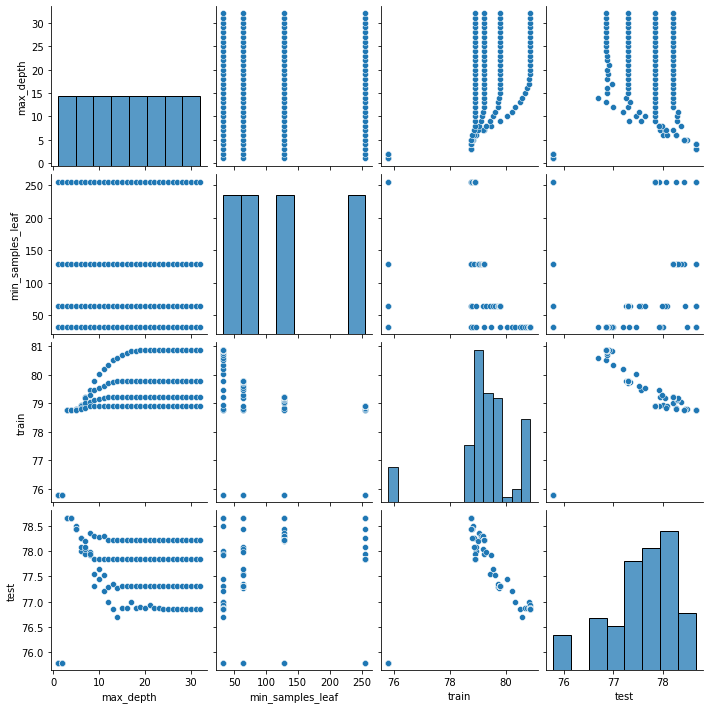

In [22]:
sns.pairplot(resultados)

Documentação [correlation](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)

In [23]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
mask

array([[ True,  True,  True,  True],
       [False,  True,  True,  True],
       [False, False,  True,  True],
       [False, False, False,  True]])

<AxesSubplot:>

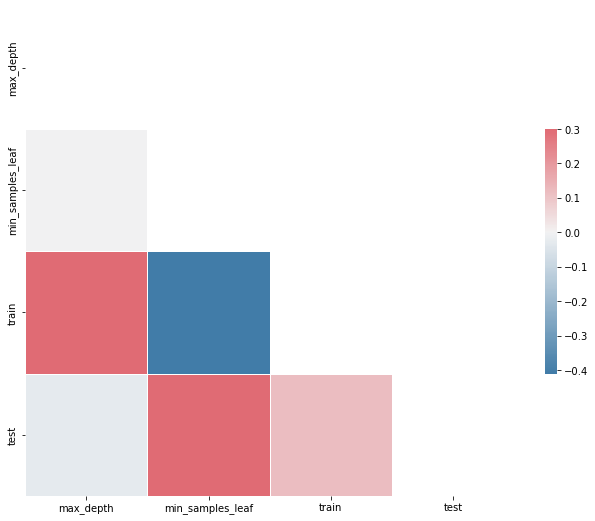

In [26]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

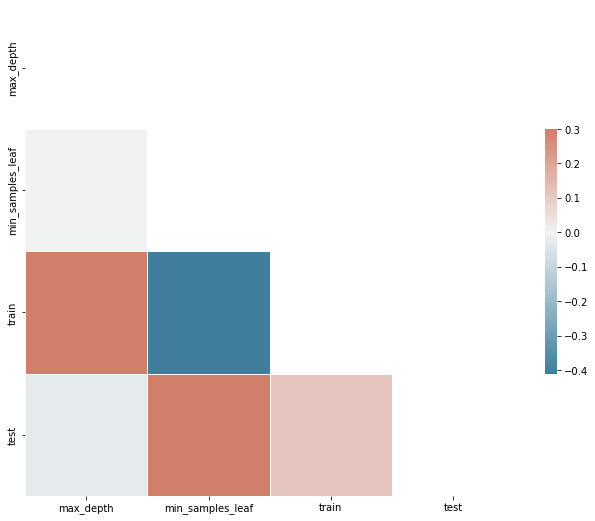

In [27]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Repare que somente os dados que nos interessam (ou seja, aqueles que não são equivalentes) são plotados com cores na matriz. Nela, percebemos que parece existir uma correlação muito forte entre test e min_samples_leaf - quanto maior o min_samples_leaf, maior a qualidade do test.

Com esses dados em mãos, podemos então testar outros valores. Como obtivemos resultados melhores com 128 e 256, vamos mantê-los, adicionando 192 e 512.

In [28]:
def busca():
    resultados = []
    for max_depth in range(1, 33):
        for min_samples_leaf in [128, 192, 256, 512]:
            tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
            resultados.append(tabela)
    resultados = pd.DataFrame(resultados, columns=['max_depth', 'min_samples_leaf', 'train', 'test'])
    return resultados

resultados = busca()
resultados.head()

Max depth = 1, min_samples_leaf = 128 teste = 75.78, treino = 75.79
Max depth = 1, min_samples_leaf = 192 teste = 75.78, treino = 75.79
Max depth = 1, min_samples_leaf = 256 teste = 75.78, treino = 75.79
Max depth = 1, min_samples_leaf = 512 teste = 75.78, treino = 75.79
Max depth = 2, min_samples_leaf = 128 teste = 75.78, treino = 75.79
Max depth = 2, min_samples_leaf = 192 teste = 75.78, treino = 75.79
Max depth = 2, min_samples_leaf = 256 teste = 75.78, treino = 75.79
Max depth = 2, min_samples_leaf = 512 teste = 75.78, treino = 75.79
Max depth = 3, min_samples_leaf = 128 teste = 78.67, treino = 78.75
Max depth = 3, min_samples_leaf = 192 teste = 78.67, treino = 78.75
Max depth = 3, min_samples_leaf = 256 teste = 78.67, treino = 78.75
Max depth = 3, min_samples_leaf = 512 teste = 77.50, treino = 77.53
Max depth = 4, min_samples_leaf = 128 teste = 78.67, treino = 78.75
Max depth = 4, min_samples_leaf = 192 teste = 78.67, treino = 78.75
Max depth = 4, min_samples_leaf = 256 teste = 78

,max_depth,min_samples_leaf,train,test
0,1,128,75.791169,75.784219
1,1,192,75.791169,75.784219
2,1,256,75.791169,75.784219
3,1,512,75.791169,75.784219
4,2,128,75.791169,75.784219


In [29]:
corr = resultados.corr()

<AxesSubplot:>

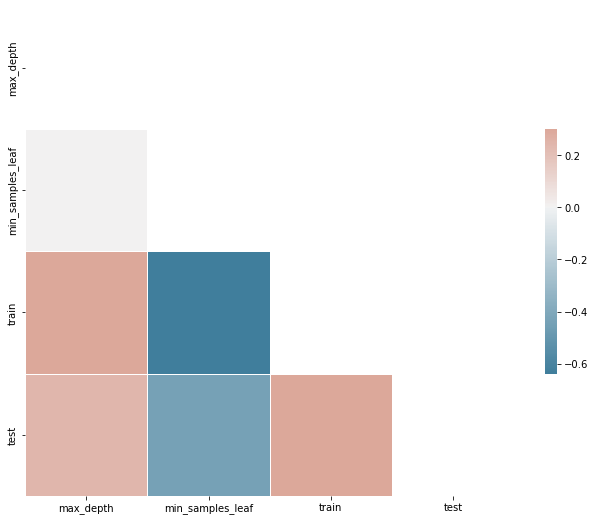

In [30]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [31]:
# tabela dos 5 melhores:

resultados.sort_values(by=['test'], ascending=False).head(5)

,max_depth,min_samples_leaf,train,test
13,4,192,78.750993,78.672633
8,3,128,78.750993,78.672633
9,3,192,78.750993,78.672633
10,3,256,78.750993,78.672633
14,4,256,78.750993,78.672633


# 03. Trabalhando com 3 ou mais dimensões:

Vamos trabalhar agora com, além dos hiperparâmetros anteriores, o min_samples_split

## Explorando 3 dimensões de hiperparâmetros:

In [32]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf = min_samples_leaf, min_samples_split = min_samples_split)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100

  tabela = [max_depth, min_samples_leaf, min_samples_split, train_score, test_score, results['fit_time'].mean(),  results['score_time'].mean()]
  return tabela

def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [32, 64, 128, 256]:
        for min_samples_split in [32, 64, 128, 256]:
          tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split)
          resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns= ["max_depth","min_samples_leaf", "min_samples_split", "train","test", "fit_time", "score_time"])
  return resultados

resultados = busca()
resultados.head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
0,1,32,32,75.791169,75.784219,0.005420,0.001772
1,1,32,64,75.791169,75.784219,0.004132,0.002375
2,1,32,128,75.791169,75.784219,0.003964,0.002395
3,1,32,256,75.791169,75.784219,0.005054,0.000578
4,1,64,32,75.791169,75.784219,0.004174,0.002286


<AxesSubplot:>

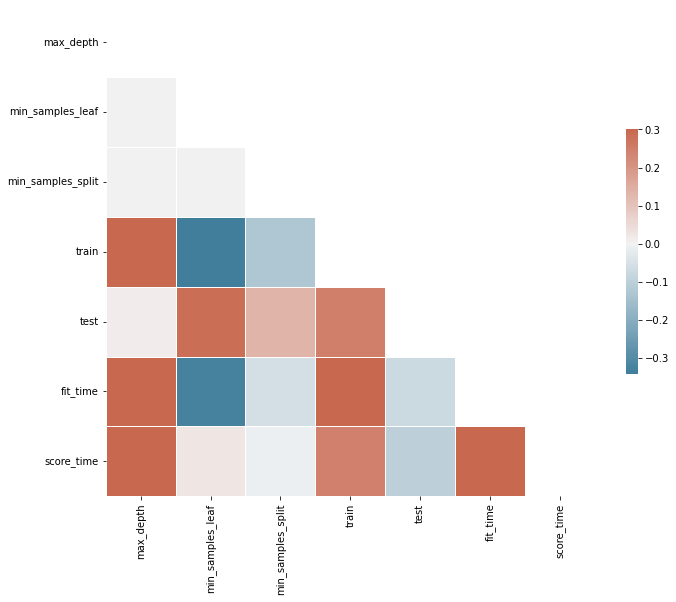

In [33]:
corr = resultados.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [34]:

resultados.sort_values(by=['test'], ascending=False).head(5)

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
63,4,256,256,78.750993,78.672633,0.010255,0.001396
48,4,32,32,78.750993,78.672633,0.007894,0.000605
34,3,32,128,78.750993,78.672633,0.004445,0.000296
35,3,32,256,78.750993,78.672633,0.007961,0.000522
36,3,64,32,78.750993,78.672633,0.008658,0.000906


# 04. Busca de parâmetros com o [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Agora que já aprendemos a importância de uma busca em grid pelos parâmetros que maximizam a métrica que estamos utilizando no nosso sistema, queremos utilizar uma ferramenta que nos ajude nesse processo.

In [35]:
from sklearn.model_selection import GridSearchCV

SEED = 301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth": [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]
}

busca = GridSearchCV(DecisionTreeClassifier(), espaco_de_parametros, cv=GroupKFold(n_splits=10))
busca.fit(x_azar, y_azar, groups=dados.modelo)

resultados = pd.DataFrame(busca.cv_results_)

resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009711,0.001224,0.001678,0.000483,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
1,0.008482,0.000889,0.001594,0.000471,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
2,0.008359,0.000587,0.001631,0.000635,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
3,0.008553,0.000879,0.001669,0.000700,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
4,0.009626,0.001141,0.001960,0.000424,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1


In [37]:
print(busca.best_params_)
print(busca.best_score_*100)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
78.67263337284332


In [38]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

In [41]:
from sklearn.metrics import accuracy_score 

# Evitar essa abordagem pois ela será muito otimista.
predicoes = melhor.predict(x_azar) 
accuracy = accuracy_score(predicoes, y_azar) * 100

print("Accuracy para os dados foi %.2f%%" % accuracy)

Accuracy para os dados foi 78.75%


# 05. Nested cross validation e validando o modelo escolhido

Utilizamos o **GridSearchCV** do SKLearn para encontrarmos o melhor conjunto de hiperparâmetros em um espaço definido, de modo a otimizar a nossa métrica (*accuracy*). Quando tentamos analisar quão bem nosso algoritmo se sairia no mundo real, pegamos o melhor conjunto (representado por `melhor`) e utilizamos um `predict()` em cima de `x_azar` - ou seja, com todos os dados e uma única vez. Porém, durante o nosso processo de aprendizado, utilizamos o *cross validation*, e existem alguns cuidados que devemos tomar a esse respeito.

[Nested versus non-nested cross-validation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html).

## Como ter uma estimativa sem esse vício nos dados que eu já vi?

No caso de cross validation com busca de hiper parâmetros, fazemos uma nova validação cruzada. Chama-se nested cross validation

In [43]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, x_azar, y_azar, cv = GroupKFold(n_splits=10), groups = dados.modelo)

C:\Users\Bruno\Anaconda3\envs\ambiente\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Bruno\Anaconda3\envs\ambiente\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Bruno\Anaconda3\envs\ambiente\lib\site-packages\sklearn\model_selection\_search.py", line 891, in fit
    self._run_search(evaluate_candidates)
  File "C:\Users\Bruno\Anaconda3\envs\ambiente\lib\site-packages\sklearn\model_selection\_search.py", line 1392, in _run_

Infelizmente como o Pandas não suporta nested validation com group k fold não conseguimos prever o resultado para novos grupos.

In [45]:
# Utilizando o kFold

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

SEED = 301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth": [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]
}

busca = GridSearchCV(DecisionTreeClassifier(), espaco_de_parametros, cv=KFold(n_splits=5, shuffle=True))
busca.fit(x_azar, y_azar)

resultados = pd.DataFrame(busca.cv_results_)

resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009016,0.000534,0.002578,0.001498,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
1,0.008835,0.000702,0.001780,0.000393,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
2,0.007918,0.000185,0.001800,0.000744,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
3,0.007956,0.001162,0.002142,0.000665,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
4,0.007615,0.000446,0.001783,0.000918,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1


In [47]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, x_azar, y_azar, cv=KFold(n_splits=5, shuffle=True))
scores

array([0.798 , 0.789 , 0.776 , 0.7795, 0.792 ])

In [50]:
def imprime_scores(scores):
  media = scores.mean() * 100
  desvio = scores.std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [51]:
imprime_scores(scores)

Accuracy médio 78.69
Intervalo [77.07, 80.31]


In [53]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

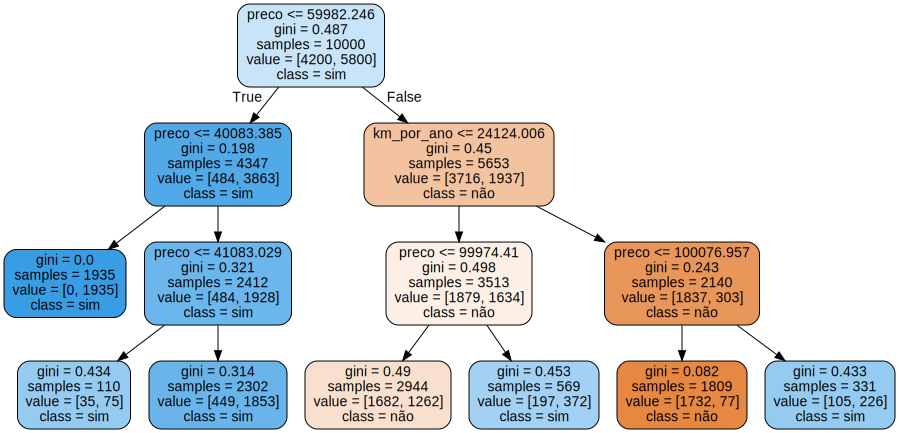

In [54]:
from sklearn.tree import export_graphviz
import graphviz


features = x_azar.columns
dot_data = export_graphviz(melhor, out_file=None, filled=True, rounded=True,
                          class_names=["não","sim"],
                          feature_names=features)
graph = graphviz.Source(dot_data)
graph